In [14]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

In [4]:
size, k, m, r_0, epsilon, dipoleKickStrengths, quadKickStrengths, tau, deltaTau, timestep, echoAmps, echoTimes = np.loadtxt("data/echo_amp.csv", delimiter=",", skiprows=1).T

In [5]:
startIndex = None
endIndex = None
d_0 = 0.004040
for (i, dipoleKickStrength) in enumerate(dipoleKickStrengths):
    if not startIndex and dipoleKickStrength == d_0:
        startIndex = i
    if not endIndex and dipoleKickStrength > d_0:
        endIndex = i

In [8]:
qStrengthSamples = quadKickStrengths[startIndex:endIndex]
echoAmpSamples = echoAmps[startIndex:endIndex]
echoTimeSamples = echoTimes[startIndex:endIndex]

qStrength = []
echoAmpAvg = []
echoAmpStd = []
echoTimeAvg = []
echoTimeStd = []

for i in range(0,100):
    qStrength.append(qStrengthSamples[i*10])

    singleAmpAvg = 0
    singleTimeAvg = 0
    for j in range(0,10):
        singleAmpAvg += echoAmpSamples[i*10+j]/10.0
        singleTimeAvg += echoTimeSamples[i*10+j]/10.0

    echoAmpAvg.append(singleAmpAvg)
    echoTimeAvg.append(singleTimeAvg)
    
    singleAmpVar = 0
    singleTimeVar = 0
    for j in range(0,10):
        singleAmpVar += np.power((echoAmpSamples[i*10+j] - singleAmpAvg), 2)/9.0
        singleTimeVar += np.power((echoTimeSamples[i*10+j] - singleAmpAvg), 2)/9.0

    echoAmpStd.append(np.sqrt(singleAmpVar))
    echoTimeStd.append(np.sqrt(singleTimeVar))

    

In [16]:
r_0 = 0.05*u.km
epsilon = 0.0000001*u.kg*u.km**2/u.s
k = 0.00112*u.kg*u.km**3/u.s**2 
m = 0.1*u.kg
tau = 1000*u.s

omega = np.sqrt(k/m)/np.power(r_0, 3.0/2.0)
omega_prime = -3/(2*m*np.power(r_0, 2.0))
print("Omega_0: ", omega)
print("Omega_prime: ", omega_prime)
print("Decoherence Time: ", 2*np.pi/(omega_prime*epsilon))
print("Optimal quad quick: ", 1/(np.sqrt(2)*omega_prime*epsilon*tau))

Omega_0:  9.465727652959384 1 / s
Omega_prime:  -5999.999999999998 1 / (kg km2)
Decoherence Time:  -10471.97551196598 s
Optimal quad quick:  -1.1785113019775795


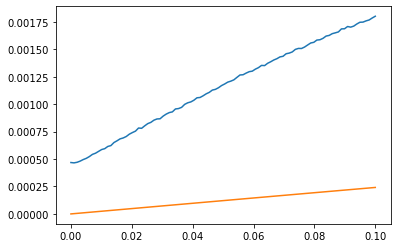

In [18]:
plt.plot(qStrength, echoAmpAvg)
Q_var = qStrength*tau*np.abs(omega_prime)*epsilon
echoAmpPrediction = d_0*Q_var/np.power(1+np.square(Q_var),1.5)
plt.plot(qStrength, echoAmpPrediction)

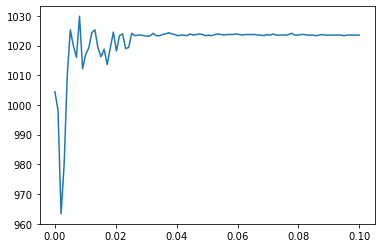

In [12]:
plt.plot(qStrength, echoTimeAvg)